In [1]:
#import libraries
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame


# 1. Business Understanding

The following questions will be focued on:

1.which are the top 5 countries conducting the survey? and what are their professional occupations?

2.How are the stackoverflow, job and career satisfaction distributed? what can be learned from this distribution?

3.How are the company size and company type distributed and what can we know from them?

# 2. Data Understanding

In [2]:
#load data set
survey_df= pd.read_csv("C:/Users/monicaran/Desktop/survey_results_public.csv")
survey_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
survey_df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [4]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 31.6+ MB


In [5]:
num_row= survey_df.shape[0]
num_col= survey_df.shape[1]
print("number of rows: {}".format(num_row))
print("number of columns: {}".format(num_col))

number of rows: 51392
number of columns: 154


In [6]:
survey_df.isnull().sum()

Respondent                         0
Professional                       0
ProgramHobby                       0
Country                            0
University                         0
EmploymentStatus                   0
FormalEducation                    0
MajorUndergrad                  8551
HomeRemote                      7384
CompanySize                    12470
CompanyType                    12569
YearsProgram                     247
YearsCodedJob                  10502
YearsCodedJobPast              50418
DeveloperType                  15267
WebDeveloperType               40696
MobileDeveloperType            49839
NonDeveloperType               46502
CareerSatisfaction              8697
JobSatisfaction                11016
ExCoderReturn                  50469
ExCoderNotForMe                50471
ExCoderBalance                 50469
ExCoder10Years                 50475
ExCoderBelonged                50464
ExCoderSkills                  50457
ExCoderWillNotCode             50470
E

In [7]:
survey_df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

# 3.Prepare Data

Taking the following steps:
1. Drop unnecessary data
2. Convert spring to number
3. handle missing values

In [8]:
#drop innecessary columns

col_to_drop=['Respondent','ProgramHobby','HomeRemote','YearsProgram','YearsCodedJob','YearsCodedJobPast','DeveloperType','WebDeveloperType','MobileDeveloperType',
'NonDeveloperType','ExCoderReturn','ExCoderNotForMe','ExCoderBalance','ExCoder10Years','ExCoderBelonged','ExCoderSkills','ExCoderWillNotCode',
'ExCoderActive','ProblemSolving','BuildingThings','LearningNewTech','BoringDetails','JobSecurity','DiversityImportant','AnnoyingUI','FriendsDevelopers',
'RightWrongWay','UnderstandComputers','SeriousWork','InvestTimeTools','WorkPayCare','KinshipDevelopers','ChallengeMyself','CompetePeers','ChangeWorld','JobSeekingStatus',
'HoursPerWeek','LastNewJob','AssessJobIndustry','AssessJobRole','AssessJobExp','AssessJobDept','AssessJobTech','AssessJobProjects','AssessJobCompensation','AssessJobOffice',
'AssessJobCommute','AssessJobRemote','AssessJobLeaders','AssessJobProfDevel','AssessJobDiversity','AssessJobProduct','AssessJobFinances','ImportantBenefits',
'ClickyKeys','JobProfile','ResumePrompted','LearnedHiring','ImportantHiringAlgorithms','ImportantHiringTechExp','ImportantHiringCommunication','ImportantHiringOpenSource',
'ImportantHiringPMExp','ImportantHiringCompanies','ImportantHiringTitles','ImportantHiringEducation','ImportantHiringRep','ImportantHiringGettingThingsDone','Currency',
'Overpaid','TabsSpaces','EducationImportant','EducationTypes','SelfTaughtTypes','TimeAfterBootcamp','CousinEducation','WorkStart','HaveWorkedLanguage','WantWorkLanguage',
'HaveWorkedFramework','WantWorkFramework','HaveWorkedDatabase','WantWorkDatabase','HaveWorkedPlatform','WantWorkPlatform','IDE','AuditoryEnvironment','Methodology',
'VersionControl','CheckInCode','ShipIt','OtherPeoplesCode','ProjectManagement','EnjoyDebugging','InTheZone','DifficultCommunication','CollaborateRemote',
'MetricAssess','EquipmentSatisfiedMonitors','EquipmentSatisfiedCPU','EquipmentSatisfiedRAM','EquipmentSatisfiedStorage','EquipmentSatisfiedRW','InfluenceInternet',  
'InfluenceWorkstation','InfluenceHardware','InfluenceServers','InfluenceTechStack','InfluenceDeptTech','InfluenceVizTools','InfluenceDatabase','InfluenceCloud','InfluenceConsultants',
'InfluenceRecruitment','InfluenceCommunication','HighestEducationParents','Race','SurveyLong','QuestionsInteresting','QuestionsConfusing','InterestedAnswers']
survey_df.drop(col_to_drop,axis=1,inplace=True)

In [9]:
survey_df.head()

,Professional,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,CompanySize,CompanyType,CareerSatisfaction,JobSatisfaction,...,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,Salary,ExpectedSalary
0,Student,United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN,...,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,NaN,NaN
1,Student,United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,...,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,NaN,37500.0
2,Professional developer,United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"10,000 or more employees",Publicly-traded corporation,8.0,9.0,...,Disagree,Strongly disagree,Strongly agree,Agree,Agree,Agree,Disagree,Male,113750.0,NaN
3,Professional non-developer who sometimes write...,United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"10,000 or more employees",Non-profit/non-governmental organization or pr...,6.0,3.0,...,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Strongly agree,Disagree,Male,NaN,NaN
4,Professional developer,Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,10 to 19 employees,"Privately-held limited company, not in startup...",6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Answer Questions

In [10]:
# 1.which are the top 10 countries conduting the survey? and what are their professional occupations?

In [11]:
#select the top 10 countries conducting the survey

top_country=survey_df['Country'].value_counts()
top_five=top_country.head()
print(top_five)

United States     11455
India              5197
United Kingdom     4395
Germany            4143
Canada             2233
Name: Country, dtype: int64


In [12]:
#understand how many types of answers included in 'Professional' column

top_professional= survey_df['Professional'].value_counts()
print(top_professional.head())
index=['Professional developer','Student','Professional non-developer who sometimes writes code','Used to be a professional developer','None of these']

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64


Professional developer                                  8310
Student                                                 1456
Professional non-developer who sometimes writes code    1199
None of these                                            247
Used to be a professional developer                      243
Name: Professional, dtype: int64

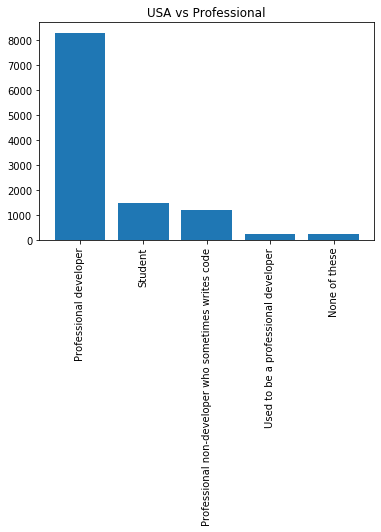

In [13]:
#distribution of Professional and USA
usa_prof=survey_df['Professional'][survey_df['Country']=='United States']
num_usa=usa_prof.value_counts()
plt.xticks(rotation='90')
plt.title('USA vs Professional')
plt.bar(index,num_usa)
num_usa

Professional developer                                  3438
Student                                                 1162
Professional non-developer who sometimes writes code     439
Used to be a professional developer                      104
None of these                                             54
Name: Professional, dtype: int64

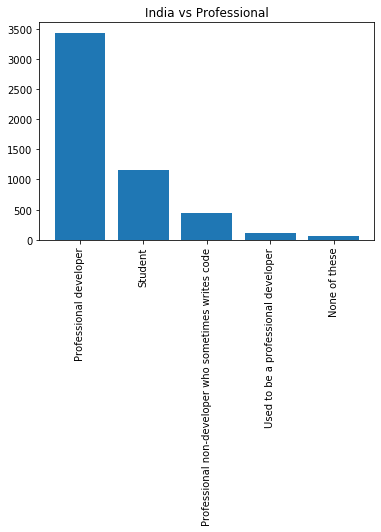

In [14]:
#distribution of Professional and USA
india_prof=survey_df['Professional'][survey_df['Country']=='India']
num_india=india_prof.value_counts()
plt.xticks(rotation='vertical')
plt.title('India vs Professional')
plt.bar(index,num_india)
num_india

Professional developer                                  3302
Student                                                  530
Professional non-developer who sometimes writes code     405
None of these                                             82
Used to be a professional developer                       76
Name: Professional, dtype: int64

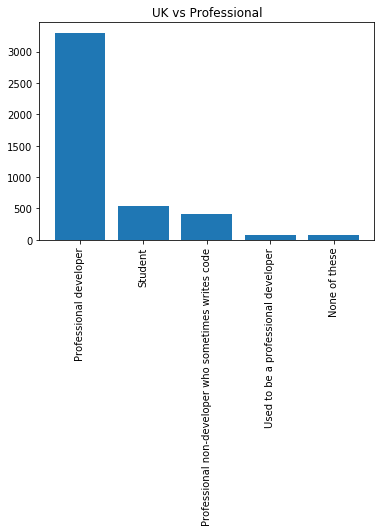

In [15]:
#distribution of Professional and United Kingsom
uk_prof=survey_df['Professional'][survey_df['Country']=='United Kingdom']
num_uk=uk_prof.value_counts()
plt.xticks(rotation='vertical')
plt.title('UK vs Professional')
plt.bar(index,num_uk)
num_uk

Professional developer                                  2767
Student                                                  731
Professional non-developer who sometimes writes code     493
None of these                                             91
Used to be a professional developer                       61
Name: Professional, dtype: int64

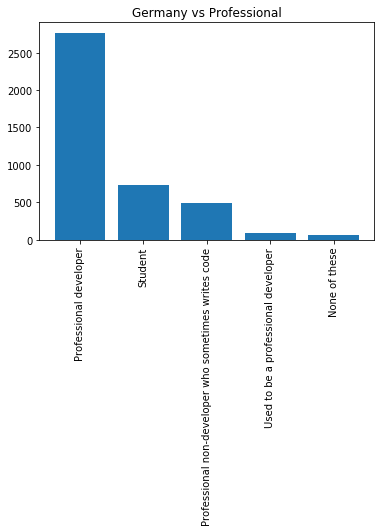

In [16]:
#distribution of Professional and Germany
ger_prof=survey_df['Professional'][survey_df['Country']=='Germany']
num_ger=ger_prof.value_counts()
plt.xticks(rotation='vertical')
plt.title('Germany vs Professional')
plt.bar(index,num_ger)
num_ger

Professional developer                                  1605
Student                                                  355
Professional non-developer who sometimes writes code     186
Used to be a professional developer                       52
None of these                                             35
Name: Professional, dtype: int64

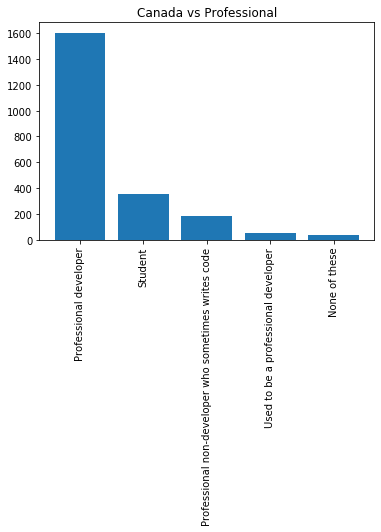

In [17]:
#distribution of Professional and Canada
can_prof=survey_df['Professional'][survey_df['Country']=='Canada']
num_can= can_prof.value_counts()
plt.xticks(rotation='vertical')
plt.title('Canada vs Professional')
plt.bar(index,num_can)
num_can

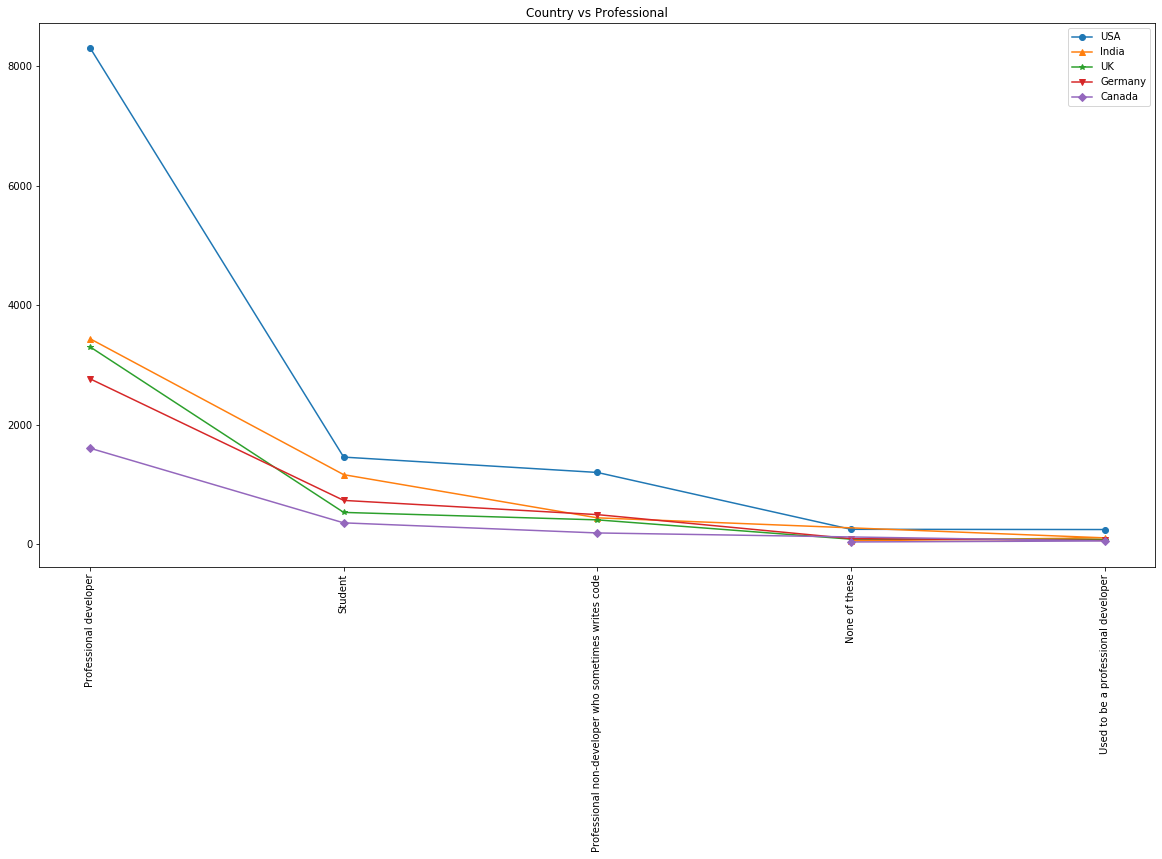

In [18]:
# put five countries' info together
plt.figure(figsize=(20,10))
plt.plot(num_usa,label='USA',marker='o')
plt.plot(num_india,label='India',marker='^')
plt.plot(num_uk,label='UK',marker='*')
plt.plot(num_ger,label='Germany',marker='v')
plt.plot(num_can,label='Canada',marker='D')
plt.xticks(rotation='vertical')
plt.title('Country vs Professional')
plt.legend()
plt.show()

As we can see from above figures, USA always has most peoeple using stackoverflow especially professional developers.Professional developers in India, UK and Germany are all approximately in the range from 3000 to 4000 while canadian professional developers are under 2000. All five countries have simialr numbers of people who used to be professional developers 

2.How are the stackoverflow, job and career satisfaction distributed? what can be learned from this distribution?

8.0     10227
9.0      9792
10.0     9166
7.0      4724
6.0      1456
5.0       716
4.0       202
3.0       162
2.0        73
1.0        38
0.0        36
Name: StackOverflowSatisfaction, dtype: int64

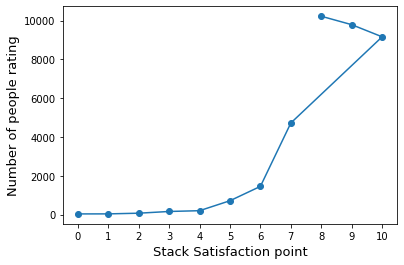

In [19]:
stack=survey_df['StackOverflowSatisfaction'].value_counts()
xtick=np.arange(0,11,1)
plt.xticks(xtick)
plt.xlabel('Stack Satisfaction point',fontsize='13')
plt.ylabel('Number of people rating',fontsize='13')
plt.plot(stack, marker='o')
stack

8.0     8983
7.0     7969
9.0     5573
6.0     4726
10.0    4148
5.0     3749
4.0     1865
3.0     1635
2.0      888
0.0      467
1.0      373
Name: JobSatisfaction, dtype: int64

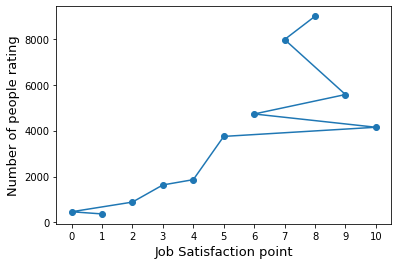

In [20]:
job= survey_df['JobSatisfaction'].value_counts()
xtick=np.arange(0,11,1)
plt.xticks(xtick)
plt.xlabel('Job Satisfaction point',fontsize='13')
plt.ylabel('Number of people rating',fontsize='13')
plt.plot(job, marker='o')
job

8.0     11037
7.0      9384
9.0      5579
10.0     5408
6.0      4721
5.0      3070
4.0      1352
3.0      1046
2.0       495
0.0       392
1.0       211
Name: CareerSatisfaction, dtype: int64

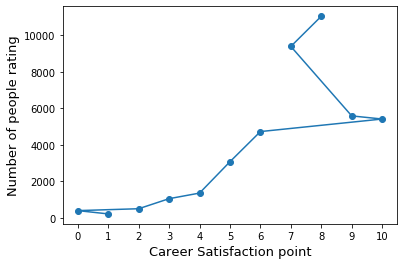

In [21]:
career= survey_df['CareerSatisfaction'].value_counts()
xtick=np.arange(0,11,1)
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.set_xticks(xtick)
ax1.set_xlabel('Career Satisfaction point',fontsize='13')
ax1.set_ylabel('Number of people rating',fontsize='13')
ax1.plot(career, marker='o')
career

put all satisfaction data together to have clearer visulization of how people are satisfied

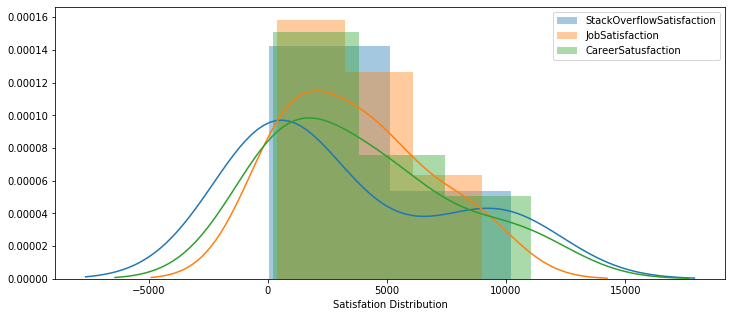

In [22]:
plt.figure(figsize=(12,5))
plt.xlabel('Satisfation Distribution')
sns.distplot(stack,label='StackOverflowSatisfaction',axlabel=False)
sns.distplot(job,label='JobSatisfaction',axlabel=False)
sns.distplot(career,label='CareerSatusfaction',axlabel=False)
plt.legend()

The above figure shows the distribution density of satisfaction. The peaks appear in range of 0-5000.Observe the plots of each satisfaction category, it is obvious that the stackoverflow, job and career satisfaction are above average. Totally above 30,000 rated stackoverflow satisfaction, and most people gave 8.0 while only around 3% gave rating under average.Thus, we can conclude that marjority are satisfied with stackoverflow. There were around 40,000 doing the investigation of job satisfaction. Although 8.0 rating is the most choice people did, there are about 22% thinking unsatisfied with their jobs. Over 40,000 completed the career satisfaction investigation. The marjority still gave 8.0 for their career but about 15% are not satisfied with their current career.

Although the top3 stand for marjority of each investigation, the KDE shows that the density of the rest points ratings is higher than top3, and this means that there are always some participants choosing the rating points besides the top3,so the peaks are in the range of 0-5000.

3.How are the company size and company type distributed and what can we know from them?

In [23]:
size= survey_df['CompanySize'].value_counts()
size

20 to 99 employees          8587
100 to 499 employees        7274
10,000 or more employees    5680
10 to 19 employees          4103
1,000 to 4,999 employees    3831
Fewer than 10 employees     3807
500 to 999 employees        2486
5,000 to 9,999 employees    1604
I don't know                 869
I prefer not to answer       681
Name: CompanySize, dtype: int64

In [24]:
Ctype= survey_df['CompanyType'].value_counts()
Ctype

Privately-held limited company, not in startup mode                      16709
Publicly-traded corporation                                               5871
I don't know                                                              3233
Sole proprietorship or partnership, not in startup mode                   2831
Government agency or public school/university                             2451
Venture-funded startup                                                    2387
I prefer not to answer                                                    1816
Pre-series A startup                                                      1288
Non-profit/non-governmental organization or private school/university     1225
State-owned company                                                        670
Something else                                                             342
Name: CompanyType, dtype: int64

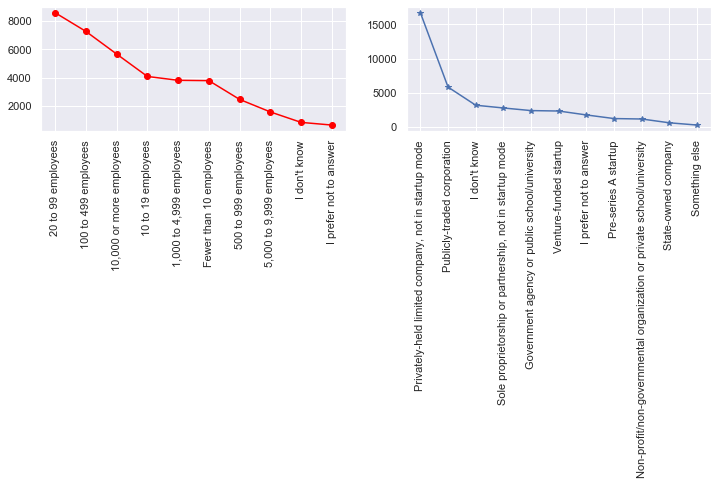

In [25]:
sns.set()
plt.figure(figsize=(12,5))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)


plt.sca(ax1)
plt.xticks(rotation='vertical')
plt.plot(size,color='red',marker='o')

plt.sca(ax2)
plt.plot(Ctype,'b',marker='*')
plt.xticks(rotation='90')
plt.show()


In [26]:
c1=Ctype.drop('Something else')

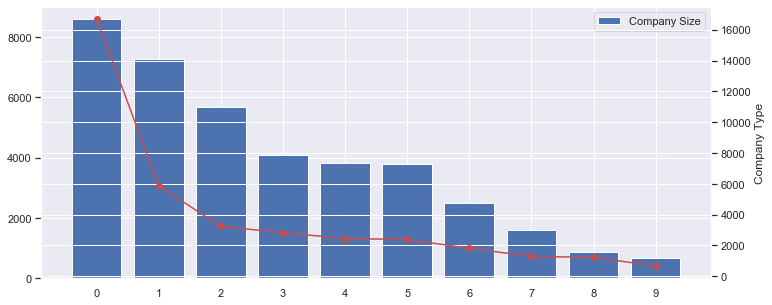

In [27]:
sns.set()
plt.rcParams['figure.figsize']=(12.0,5.0)
point=['0','1','2','3','4','5','6','7','8','9']
fig= plt.figure()
ax1= fig.add_subplot()
ax1.bar(point,size,label='Company Size')
ax1.legend()
ax2=ax1.twinx()
ax2.plot(point,c1,'r',marker='o')
ax2.set_ylabel('Company Type')
plt.show()

The two subplots show that the 'CompanySize' column has more differences which means participants don't have average distribution and marjority stay in private companies. And most people come from small companies (22-99 employees).
This combined figure indiacates that the 'Company Type' has greater disparity between the first and the last. It shows that the private companies and small compaies are main part of the market. 